# Benchmark

You can get a glimpse on the benchmark we are using by playing with this notebook

In [2]:
import pandas as pd
url1 = 'https://ai-benchmark.com/ranking.html'
score_table = pd.read_html(url1)[1]
score_table = score_table.drop([0],axis=0)
print(score_table[0:10])

model_list = list(score_table["Model"])
RAM_list = list(score_table["RAM"])
os_list = list(score_table["Android"])
cpu_list = list(score_table["CPU-F Score"])
fp16_list = list(score_table["FP16 Memory"])

                    Model                 SoC     RAM    Year Android  \
1        Asus ROG Phone 7  Snapdragon 8 Gen 2    16GB  2023.0      13   
2         Asus Zenfone 10  Snapdragon 8 Gen 2     8GB  2023.0      13   
3    Xiaomi Redmi K60 Pro  Snapdragon 8 Gen 2    12GB  2023.0      13   
4         Xiaomi 13 Ultra  Snapdragon 8 Gen 2    16GB  2023.0      13   
5     Samsung Galaxy S23+  Snapdragon 8 Gen 2     8GB  2023.0      13   
..                    ...                 ...     ...     ...     ...   
948               Cat S30      Snapdragon 210     1GB  2015.0     5.1   
949            HTC One X+      Nvidia Tegra 3     1GB  2012.0     5.1   
950     Samsung Galaxy S2    Exynos 4210 Dual     1GB  2011.0      10   
951        Asus Fonepad 7    Intel Atom Z2520     1GB  2013.0       5   
952  Samsung Galaxy Young       Snapdragon S1  0.75GB  2013.0       5   

     Updated   Lib  CPU-Q Score  CPU-F Score  INT8 NNAPI 1.1  ...  \
1       7.23  qhqh        18.50        20.20          

In [3]:
url2= 'https://ai-benchmark.com/data/results_phones.htm'
result_table = pd.read_html(url2)[0]
for i in range(5):
    result_table = result_table.drop([i], axis=0)

result_table = result_table.drop([0], axis=1)
result_table.columns = [str(i) for i in range(109)]
print(result_table)
model_list2 = list(result_table["0"])
cpu_speed = list(result_table["3"])
print(cpu_speed)
  # 
  # speed_table = speed_table.drop([0],axis=0)
  # speed_table = speed_table.drop([0],axis=1)
  # speed_table = speed_table.drop([4],axis=0)
  # speed_table = speed_table.drop([1],axis=0)
  # speed_table = speed_table.drop([2],axis=0)
  # speed_table = speed_table.drop([3],axis=0)
  # speed_table.columns = [str(i) for i in range(109)]

  # cpu_score_list = list(score_table['CPU-F Score'] )
  # mem_score_list =  list(score_table['FP16 Memory'] )

  # model_name =list(score_table['Model'] )
  # model_score = {}
  # for i,name in enumerate(model_name):
  #   model_score[name] = (cpu_score_list[i], mem_score_list[i])

                        0                   1      2     3      4      5  \
5        Asus ROG Phone 7  Snapdragon 8 Gen 2     13    20    0.5    0.2   
6         Asus Zenfone 10  Snapdragon 8 Gen 2     14    23    0.6    0.2   
7    Xiaomi Redmi K60 Pro  Snapdragon 8 Gen 2     12    19    0.6    0.2   
8         Xiaomi 13 Ultra  Snapdragon 8 Gen 2     15    26    0.6    0.2   
9     Samsung Galaxy S23+  Snapdragon 8 Gen 2     16    26    0.6    0.2   
..                    ...                 ...    ...   ...    ...    ...   
952               Cat S30      Snapdragon 210    435   524    435    423   
953            HTC One X+      Nvidia Tegra 3    231   528    231    225   
954     Samsung Galaxy S2    Exynos 4210 Dual    307   630    303    283   
955        Asus Fonepad 7    Intel Atom Z2520  13532  1495  13532  13257   
956  Samsung Galaxy Young       Snapdragon S1    649  1170    649    666   

        6     7     8    9  ...     99    100    101   102   103   104   105  \
5    1.

In [4]:
spec_dict = {}
speed_list = []
cpu_f_analyze_list = []
ram_analyze_list = []
fp16_mem_analyze_list = []
android_os_analyze_list = []
for i, name in enumerate(model_list):
    try:
        index = model_list2.index(name)
    except:
        next
    spec_dict[i] = {
        "device": name,
        "cpu_f": float(cpu_list[i]),
        "ram": float(RAM_list[i][:-2]),
        "fp16_mem": float(fp16_list[i]),
        "android_os": float(os_list[i]) if os_list[i] != "12L" else float(12),
        "speed": float(cpu_speed[index])
    }
    speed_list.append(spec_dict[i]["speed"])
    cpu_f_analyze_list.append(spec_dict[i]["cpu_f"])
    ram_analyze_list.append(spec_dict[i]["ram"])
    fp16_mem_analyze_list.append(spec_dict[i]["fp16_mem"])
    android_os_analyze_list.append(spec_dict[i]["android_os"])
print(spec_dict)
print(len(spec_dict))

import random
keys = list(spec_dict.keys())
random.shuffle(keys)

shuffled_spec_dict = {}
for key in keys:
    shuffled_spec_dict[key] = spec_dict[key]


{0: {'device': 'Asus ROG Phone 7', 'cpu_f': 20.2, 'ram': 16.0, 'fp16_mem': 2100.0, 'android_os': 13.0, 'speed': 20.0}, 1: {'device': 'Asus Zenfone 10', 'cpu_f': 18.4, 'ram': 8.0, 'fp16_mem': 2000.0, 'android_os': 13.0, 'speed': 23.0}, 2: {'device': 'Xiaomi Redmi K60 Pro', 'cpu_f': 20.6, 'ram': 12.0, 'fp16_mem': 2100.0, 'android_os': 13.0, 'speed': 19.0}, 3: {'device': 'Xiaomi 13 Ultra', 'cpu_f': 19.3, 'ram': 16.0, 'fp16_mem': 2100.0, 'android_os': 13.0, 'speed': 26.0}, 4: {'device': 'Samsung Galaxy S23+', 'cpu_f': 19.4, 'ram': 8.0, 'fp16_mem': 2100.0, 'android_os': 13.0, 'speed': 26.0}, 5: {'device': 'Motorola Edge 40 Pro', 'cpu_f': 17.5, 'ram': 12.0, 'fp16_mem': 2100.0, 'android_os': 13.0, 'speed': 37.0}, 6: {'device': 'Samsung Galaxy S23 Ultra', 'cpu_f': 18.6, 'ram': 12.0, 'fp16_mem': 2100.0, 'android_os': 13.0, 'speed': 26.0}, 7: {'device': 'Xiaomi 13 Pro', 'cpu_f': 18.9, 'ram': 12.0, 'fp16_mem': 2100.0, 'android_os': 13.0, 'speed': 26.0}, 8: {'device': 'Samsung Galaxy S23', 'cpu_f'

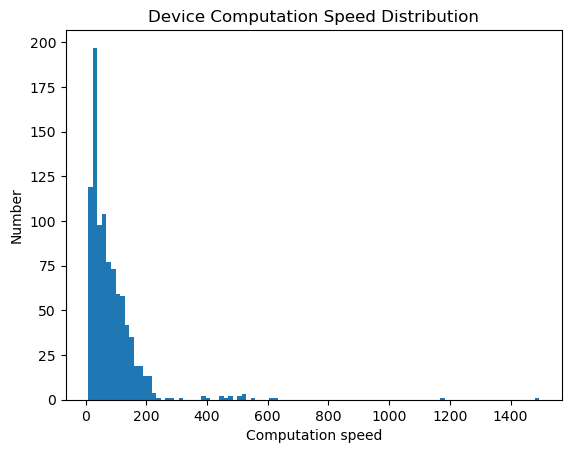

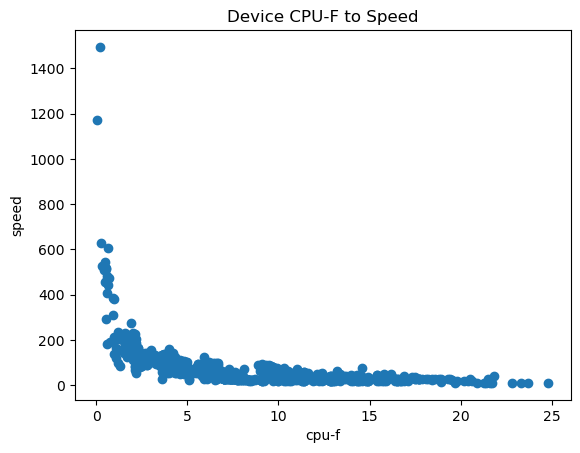

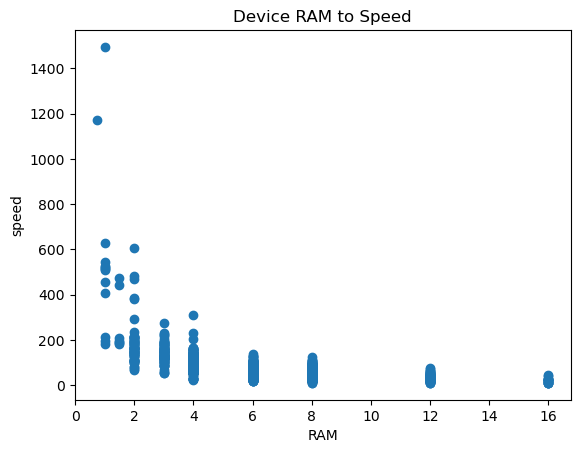

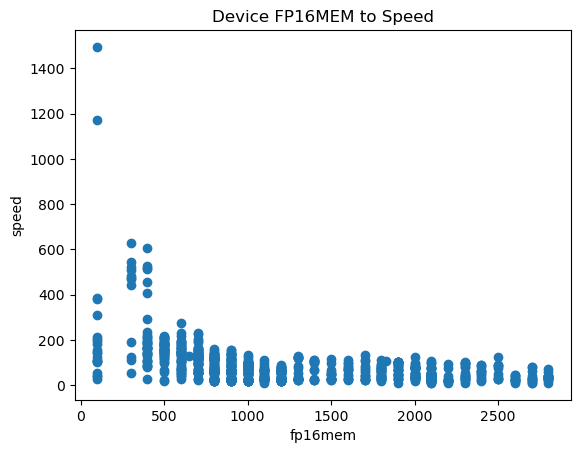

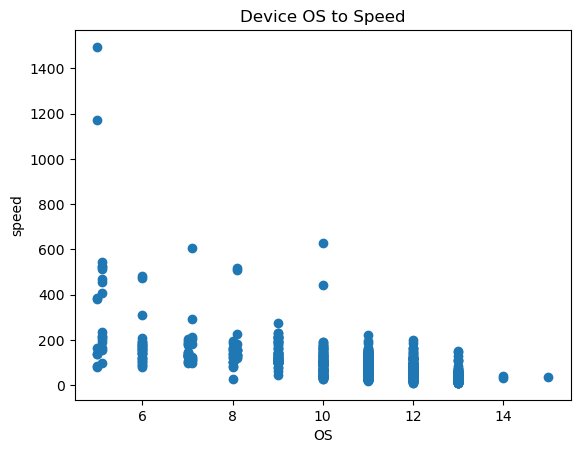

In [6]:
import matplotlib.pyplot as plt
plt.hist(speed_list, bins=100)
plt.xlabel('Computation speed')
plt.ylabel('Number')
plt.title('Device Computation Speed Distribution')
plt.show()

plt.scatter(cpu_f_analyze_list, speed_list)
plt.xlabel('cpu-f')
plt.ylabel('speed')
plt.title('Device CPU-F to Speed')
plt.show()

plt.scatter(ram_analyze_list, speed_list)
plt.xlabel('RAM')
plt.ylabel('speed')
plt.title('Device RAM to Speed')
plt.show()

plt.scatter(fp16_mem_analyze_list, speed_list)
plt.xlabel('fp16mem')
plt.ylabel('speed')
plt.title('Device FP16MEM to Speed')
plt.show()

plt.scatter(android_os_analyze_list, speed_list)
plt.xlabel('OS')
plt.ylabel('speed')
plt.title('Device OS to Speed')
plt.show()


In [41]:
import pickle
file_path = '../datasets/device_info/client_spec_speed'

# Pickle and dump the data to the file
with open(file_path, 'wb') as file:
    pickle.dump(shuffled_spec_dict, file)